In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('df_final.csv')
dados = dados.drop(['url','header','address','crawler','crawled_at'],axis=1)
dados = dados.rename(columns = {'rooms': 'quartos', 'bathrooms': 'banheiros', 'price':'aluguel',
                               'neighborhood':'bairro','garages':'vagas'}, inplace = False)
dados.head()

,id,area,quartos,banheiros,vagas,amenities,aluguel,condo,bairro,zona
0,2512663008,30,1,1,1,Mobiliado\nPiscina\nAcademia\nAr-condicionado\...,3500.0,2.0,Vila Madalena,Oeste
1,2518591697,98,2,2,1,Aceita animais\nPortaria 24h,2600.0,1000.0,Perdizes,Oeste
2,2518566682,126,3,2,1,Condomínio fechado\nAceita animais\nPortaria 2...,3900.0,1640.0,Jardim Paulista,Oeste
3,2519041802,78,2,2,1,Elevador\nPortaria 24h,2500.0,761.0,Vila Madalena,Oeste
4,2514428582,186,4,4,3,Piscina\nVaranda gourmet\nAcademia\nChurrasque...,7500.0,1730.0,Vila Suzana,Oeste


In [4]:
dados = dados[dados['zona'] != 'nenhuma']
dados.vagas = pd.to_numeric(dados.vagas, errors='coerce')
dados.vagas = dados.vagas.fillna(0)
dados.shape

(5084, 10)

In [6]:
dados[(dados.zona=='Oeste')&(dados.quartos==2.0)&(dados.area==70)&(dados.vagas==2.0)]

,id,area,quartos,banheiros,vagas,amenities,aluguel,condo,bairro,zona
275,2518957275,70,2,1,2.0,Piscina\nAcademia\nChurrasqueira\nAceita anima...,2900.0,1129.0,Perdizes,Oeste
319,2518758512,70,2,1,2.0,Piscina\nAcademia\nJardim\nSalão de festas\nSauna,2300.0,1100.0,SP,Oeste
418,2518882822,70,2,2,2.0,Área de serviço\nSalão de festas\nEscritório,3185.0,1200.0,Vila Madalena,Oeste
591,2514574886,70,2,2,2.0,Área de serviço\nJardim\nPlayground\nSalão de ...,2400.0,1343.0,Pinheiros,Oeste
655,2518533041,70,2,2,2.0,Piscina\nAcademia\nChurrasqueira\nElevador\nCo...,2850.0,575.0,Barra Funda,Oeste
1035,2518569675,70,2,2,2.0,Mobiliado\nPiscina\nVaranda\nChurrasqueira\nAr...,4500.0,970.0,Vila Madalena,Oeste
1060,2512502983,70,2,2,2.0,Piscina\nVaranda\nElevador\nCozinha\nÁrea de s...,3500.0,1100.0,Pinheiros,Oeste


In [9]:
dados[(dados.zona=='Oeste')&(dados.quartos==2.0)&(dados.area==70)&(dados.vagas==2.0)]['aluguel'].mean()

3090.714285714286

In [10]:
dados[(dados.zona=='Oeste')&(dados.quartos==2.0)&(dados.area==70)&(dados.vagas==2.0)]['aluguel'].median()

2900.0

In [17]:
X = dados[['area','quartos','zona','vagas','banheiros','condo']]
y = dados['aluguel']

In [18]:
X.tail()

,area,quartos,zona,vagas,banheiros,condo
5079,140,4,Norte,3.0,5,1680.0
5080,100,3,Norte,1.0,3,871.0
5081,65,2,Norte,1.0,2,630.0
5082,74,3,Norte,2.0,2,630.0
5083,44,2,Norte,1.0,1,475.0


In [19]:
X = pd.get_dummies(X)
X.head()

,area,quartos,vagas,banheiros,condo,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,30,1,1.0,1,2.0,0,0,0,1,0
1,98,2,1.0,2,1000.0,0,0,0,1,0
2,126,3,1.0,2,1640.0,0,0,0,1,0
3,78,2,1.0,2,761.0,0,0,0,1,0
4,186,4,3.0,4,1730.0,0,0,0,1,0


In [20]:
X.head(1)

,area,quartos,vagas,banheiros,condo,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,30,1,1.0,1,2.0,0,0,0,1,0


In [21]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)

KNeighborsRegressor()

# 2 quartos, 2 banheiros, 2 vagas e 70m², na zona oeste

In [23]:
neigh.predict([[70, 2, 2, 2, 560, 0, 0, 0, 1, 0]])

array([2640.])

In [24]:
import matplotlib.pyplot as plt

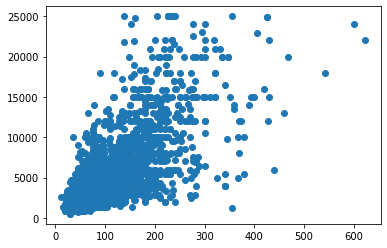

In [25]:
plt.scatter(dados['area'],dados['aluguel'])

In [26]:
import numpy as np

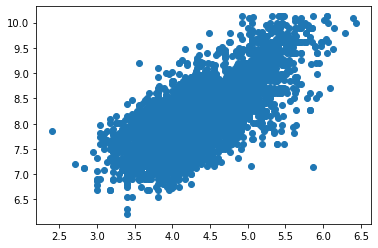

In [27]:
plt.scatter(np.log(dados['area']),np.log(dados['aluguel']))

In [33]:
dados_reduzidos = dados[['area','aluguel']]
dados_reduzidos.head()

,area,aluguel
0,30,3500.0
1,98,2600.0
2,126,3900.0
3,78,2500.0
4,186,7500.0


In [34]:
X = dados_reduzidos['area']
y = dados_reduzidos['aluguel']

In [35]:
X.values

array([ 30,  98, 126, ...,  65,  74,  44])

In [36]:
X.values.reshape(-1,1)

array([[ 30],
       [ 98],
       [126],
       ...,
       [ 65],
       [ 74],
       [ 44]])

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [38]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression()

In [39]:
reg.coef_

array([43.61341555])

In [40]:
reg.intercept_

255.76051522098078

$$aluguel = w_1 * area + C$$

In [42]:
X = dados[['area','quartos','zona','vagas','banheiros','condo']]
y = dados['aluguel']

In [43]:
X.head()

,area,quartos,zona,vagas,banheiros,condo
0,30,1,Oeste,1.0,1,2.0
1,98,2,Oeste,1.0,2,1000.0
2,126,3,Oeste,1.0,2,1640.0
3,78,2,Oeste,1.0,2,761.0
4,186,4,Oeste,3.0,4,1730.0


In [44]:
X = pd.get_dummies(X)
X.head()

,area,quartos,vagas,banheiros,condo,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,30,1,1.0,1,2.0,0,0,0,1,0
1,98,2,1.0,2,1000.0,0,0,0,1,0
2,126,3,1.0,2,1640.0,0,0,0,1,0
3,78,2,1.0,2,761.0,0,0,0,1,0
4,186,4,3.0,4,1730.0,0,0,0,1,0


In [45]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [46]:
reg.coef_

array([ 4.38705779e+01, -1.02037301e+03,  1.90103396e+02,  5.46705348e+02,
        3.83103572e-04, -1.73510492e+02, -4.58652892e+02, -3.18540658e+02,
        2.61580859e+02,  6.89123183e+02])

In [47]:
reg.intercept_

690.4879289380037

$$aluguel = w_1 * area + w_2 *	quartos+ w_3 *banheiro + w_4*vaga + w_5*	zonacentro+ w_6 *	zonaleste + w_7 *	zonanorte + w_7 *	zonaoeste + w_8*zonasul +  b$$

In [48]:
reg.predict([[72, 2, 2, 2, 560, 0, 0, 0, 1, 0]])

array([3543.83639542])

In [49]:
dados.head()

,id,area,quartos,banheiros,vagas,amenities,aluguel,condo,bairro,zona
0,2512663008,30,1,1,1.0,Mobiliado\nPiscina\nAcademia\nAr-condicionado\...,3500.0,2.0,Vila Madalena,Oeste
1,2518591697,98,2,2,1.0,Aceita animais\nPortaria 24h,2600.0,1000.0,Perdizes,Oeste
2,2518566682,126,3,2,1.0,Condomínio fechado\nAceita animais\nPortaria 2...,3900.0,1640.0,Jardim Paulista,Oeste
3,2519041802,78,2,2,1.0,Elevador\nPortaria 24h,2500.0,761.0,Vila Madalena,Oeste
4,2514428582,186,4,4,3.0,Piscina\nVaranda gourmet\nAcademia\nChurrasque...,7500.0,1730.0,Vila Suzana,Oeste


In [50]:
X = pd.get_dummies(X)
X.head()

,area,quartos,vagas,banheiros,condo,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,30,1,1.0,1,2.0,0,0,0,1,0
1,98,2,1.0,2,1000.0,0,0,0,1,0
2,126,3,1.0,2,1640.0,0,0,0,1,0
3,78,2,1.0,2,761.0,0,0,0,1,0
4,186,4,3.0,4,1730.0,0,0,0,1,0


In [51]:
y.head()

0    3500.0
1    2600.0
2    3900.0
3    2500.0
4    7500.0
Name: aluguel, dtype: float64

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt2 = DecisionTreeRegressor(max_depth=3)
dt2.fit(X,y)

DecisionTreeRegressor(max_depth=3)

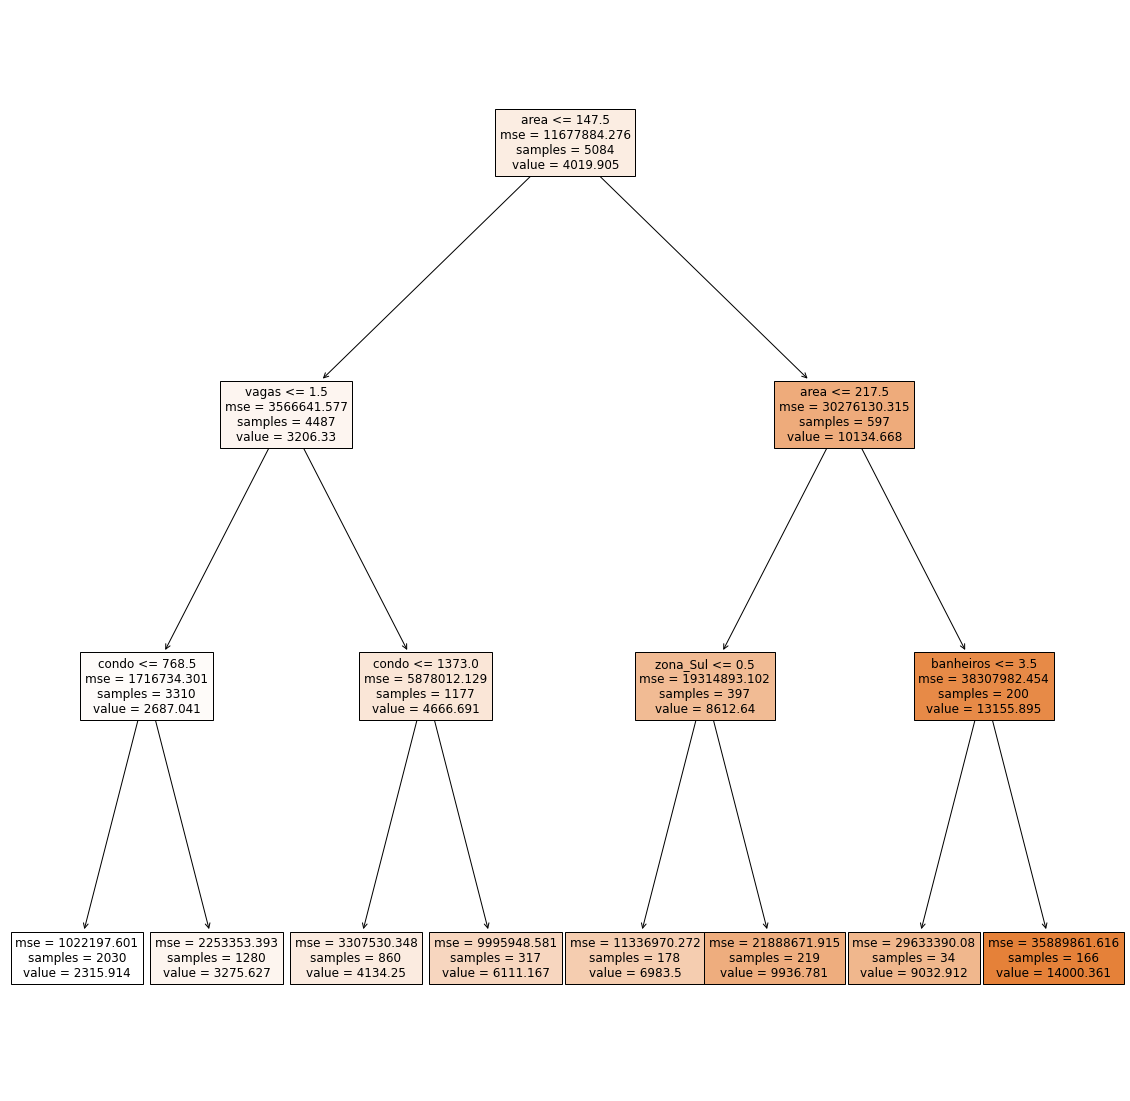

In [53]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt2, filled=True, feature_names=X.columns);

In [123]:
area_maxima = 147
area_filtro = dados['area'] <= area_maxima

In [124]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X[area_filtro],y[area_filtro])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

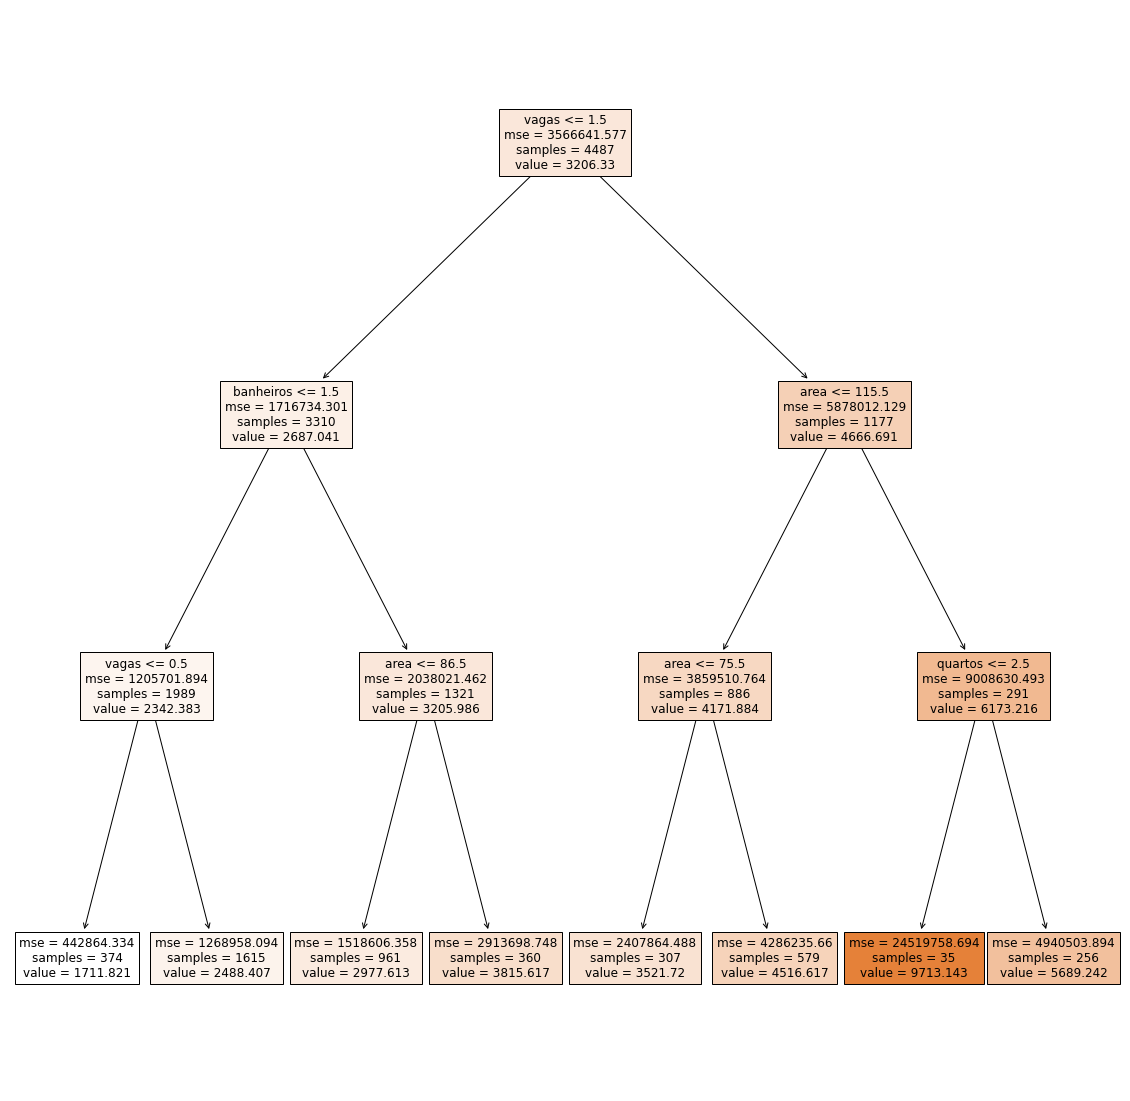

In [125]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True, feature_names=X.columns);

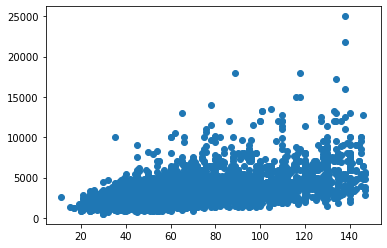

In [126]:
plt.scatter(dados[area_filtro]['area'],dados[area_filtro]['aluguel'])

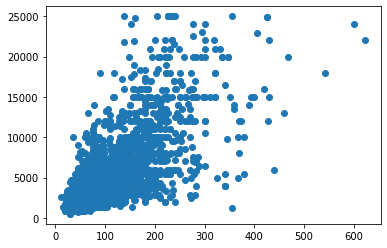

In [127]:
plt.scatter(dados['area'],dados['aluguel'])

In [128]:
dt.predict([[72, 2, 1, 2, 0, 0, 0, 1, 0]])

array([2977.61290323])

In [129]:
dt2.predict([[72, 2, 1, 2, 0, 0, 0, 1, 0]])

array([3205.98637396])